## Классификация новостей (Fake True)

### Импортируем библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

### Загрузка датасетов

In [3]:
fake_news = pd.read_csv('Fake.csv')
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_news = pd.read_csv('True.csv')
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_news['fake'] = 1
fake_news.head()

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [6]:
true_news['fake'] = 0
true_news.head()

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


### Создание общего датасета

In [7]:
news = pd.concat([fake_news, true_news])
news.sample(10)

,title,text,subject,date,fake
14980,It's all his fault: Italy's left obsessed with...,ROME (Reuters) - National elections are loomin...,worldnews,"November 13, 2017",0
10828,"RUSH LIMBAUGH, WIFE KATHRYN, SEAN HANNITY and ...",Radio host and frequent FOX News contributor L...,politics,"May 20, 2017",1
6413,Debate over firing U.S. consumer watchdog dire...,(The Jan. 10 story corrects Sasse’s state to ...,politicsNews,"January 10, 2017",0
16334,Twitter bans ads from two Russian media outlet...,SAN FRANCISCO (Reuters) - Twitter Inc on Thurs...,worldnews,"October 26, 2017",0
12992,AMAZING ENTRANCE! Trump Does “Les Deplorables”...,,politics,"Sep 16, 2016",1
19877,WIKILEAKS Posts NEW Document…Shows Hillary Rep...,Hillary Clinton is the last person you want pl...,left-news,"Oct 3, 2016",1
30,"BREAKING: Cop Finally Gets His Due, Walter Sc...","In America, we have been having a conversation...",News,"December 7, 2017",1
16906,Doubts about smoking gun as Duterte lauds Chin...,"MANILA/MARAWI CITY, Philippines (Reuters) - Ph...",worldnews,"October 20, 2017",0
21584,2009 DUKES OF HAZARD VIDEO EERILY PREDICTS THE...,,left-news,"Jul 8, 2015",1
1188,Everyone Is Wondering Just What James Comey W...,"After former FBI Director, James Comey was fir...",News,"June 11, 2017",1


In [8]:
news.isna().sum()

title      0
text       0
subject    0
date       0
fake       0
dtype: int64

In [9]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   fake     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


### Исследовательский анализ данных

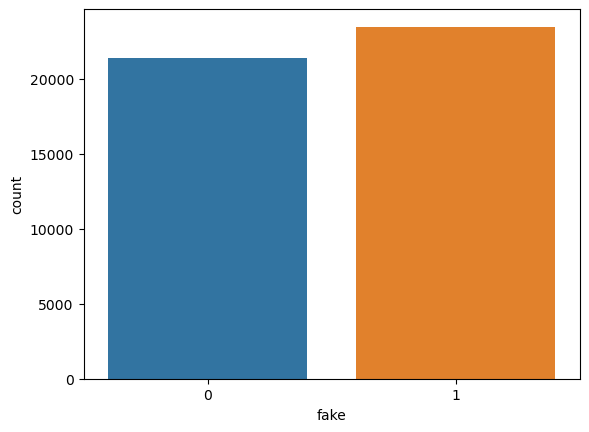

In [10]:
sns.countplot(x='fake', data=news)
plt.show()

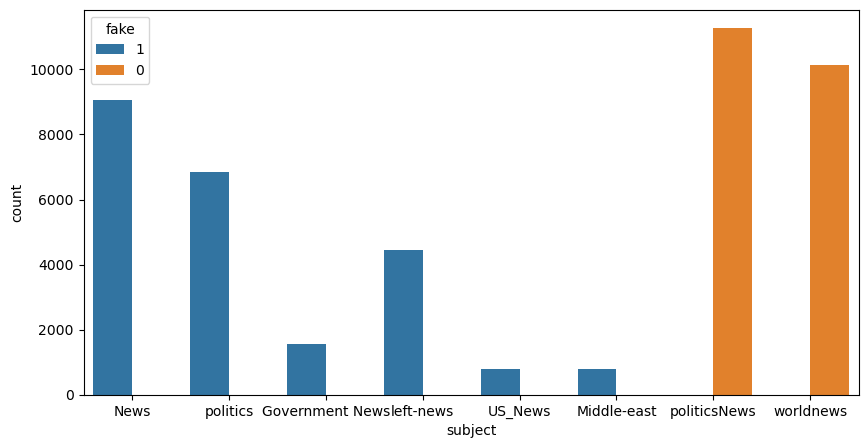

In [11]:
plt.figure(figsize=(10,5))
news['fake'] = news['fake'].astype(str)
sns.countplot(x='subject', data=news, hue='fake')
plt.show()

### Финальная предобработка

In [12]:
news['text'] = news['title'] + news['text']
news.drop(labels=('title'), axis=1, inplace=True)
news.head()

,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",1


In [14]:
news.drop(labels=['subject', 'date'], axis=1, inplace=True)
news.head()

,text,fake
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(news['text'].to_numpy(), news['fake'].to_numpy(), test_size=0.2, random_state=23)

In [18]:
round(sum([len(i.split()) for i in X_train]) / len(X_train))

416

In [19]:
max_vocab_length = 10000
max_length = 416

In [20]:
from keras.layers import TextVectorization
text_vectorizer = TextVectorization(max_tokens=max_vocab_length, output_mode='int', output_sequence_length=max_length)
text_vectorizer.adapt(X_train)

In [23]:
sample_sentense = "Hello, World! Hello! I don't speak English"
text_vectorizer([sample_sentense])

<tf.Tensor: shape=(1, 416), dtype=int64, numpy=
array([[   1,  180,    1,   37, 4813,  929, 2636,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   